# MachineHack: Grocery Sales Forecast

##Overview
Sales forecasting has always been one of the most predominant applications of machine learning. Big companies like Walmart have been employing this technique to achieve steady and enormous growth over decades now. In this challenge, you as a data scientist must use machine learning to help a small grocery store in predicting its future sales and making better business decisions. Given the daily sales of a grocery shop recorded over a period of almost 2 years, your objective as a data scientist is to build a machine learning model that can forecast the sales for the upcoming 3 months. You are provided with the recorded observation of daily sales of a grocery shop over a period of 692 days to forecast the sales of the next 90 days. 

## Data Description 

The unzipped folder will have the following files. 

Train.csv – 692 observations. 

Test.csv – 90 observations. 

Sample Submission – Sample format for the submission. 

Target Variable: GrocerySales 

## Evaluation
RMSE: np.sqrt(mean_squared_error(y_true, y_pred))

## Additional details
For data and more info, visit: https://www.machinehack.com/hackathons/grocery_sales_forecast_weekend_hackathon_4/overview

In [ ]:
# import necessary libraries 

%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sqlite3 
import nltk
import string
import re
import pickle

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors

from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer

from collections import Counter
from tqdm import tqdm
import os

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# mount google drive 

from google.colab import drive 
drive.mount('/content/gdrive')

In [ ]:
mypath = '/content/gdrive/My Drive/MachineHack/'
train_data = pd.read_csv(mypath + 'Train.csv')
test_data = pd.read_csv(mypath + 'Test.csv')

In [ ]:
train_data.head()

,Day,GrocerySales
0,1,8418.59
1,2,8447.47
2,3,8336.49
3,4,8579.17
4,5,8524.31


In [ ]:
test_data.head()

,Day
0,693
1,694
2,695
3,696
4,697


In [ ]:
print(train_data.shape)
print(test_data.shape)

(692, 2)
(90, 1)


In [ ]:
train_data.isnull().sum()

Day             0
GrocerySales    0
dtype: int64

In [ ]:
test_data.isnull().sum()

Day    0
dtype: int64

In [ ]:
train_data.index = train_data.Day
train_data.drop('Day', axis = 1, inplace = True)

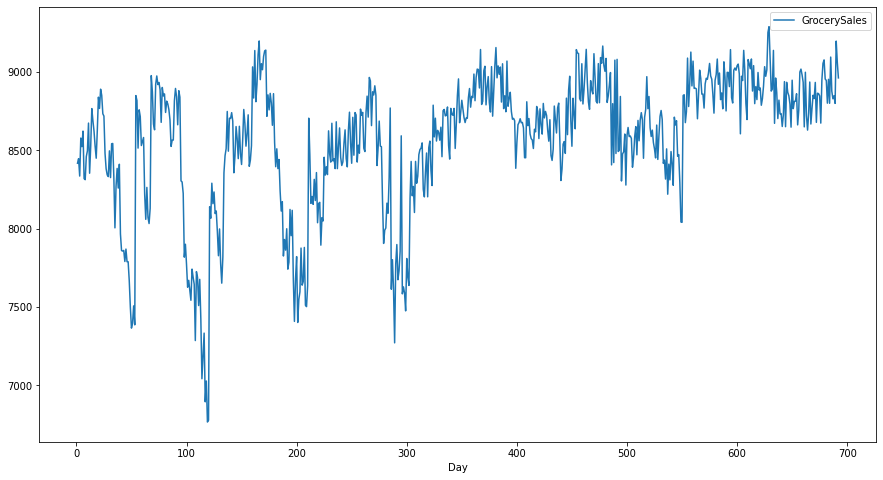

In [ ]:
train_data.plot(figsize = (15, 8))

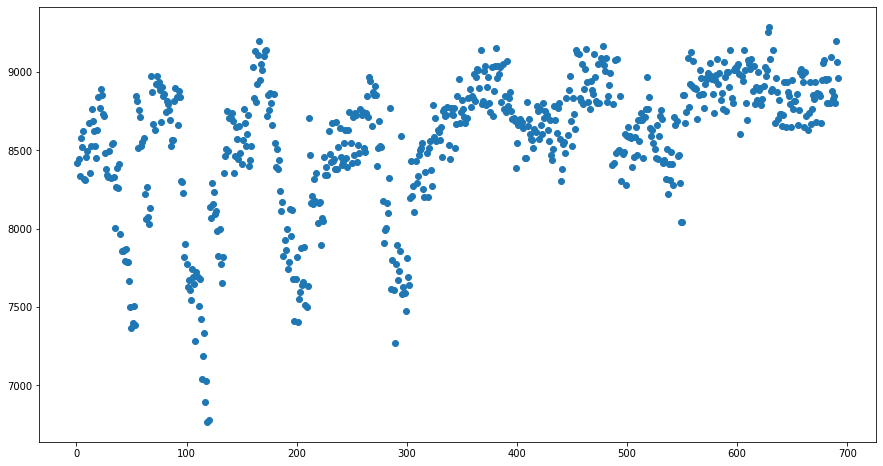

In [ ]:
plt.figure(figsize = (15, 8))
plt.scatter(train_data.index, train_data)

In [ ]:
train_data.reset_index(inplace = True)

### Model 1: Simple Linear Regression

In [ ]:
# splitting the data into train and cv 

y = train_data['GrocerySales'].values.reshape(-1,1)
X = train_data['Day'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split

X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.2)
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)

(553, 1) (553, 1)
(139, 1) (139, 1)


In [ ]:
# simple linear regression model 

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_cv_pred = lr.predict(X_cv)

In [ ]:
from sklearn.metrics import mean_squared_error 

rmse = mean_squared_error(y_cv, y_cv_pred, squared = False)
rmse

367.67272298107565

In [ ]:
y_train = train_data['GrocerySales'].values.reshape(-1,1)
X_train = train_data['Day'].values.reshape(-1,1)
X_test = test_data.values.reshape(-1,1)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [ ]:
lr_sub_3 = pd.DataFrame(data = y_pred, columns = {'GrocerySales'})
lr_sub_3.head()

,GrocerySales
0,8935.751307
1,8936.822065
2,8937.892824
3,8938.963582
4,8940.034341


In [ ]:
lr_sub_3.to_excel(mypath + 'lr_sub_3.xlsx', index = False)

### Model 2: Linear SVR 
(regularized with L1 loss)


In [ ]:
# splitting the data into train and cv 

y = train_data['GrocerySales'].values.reshape(-1,1)
X = train_data['Day'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split

X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.2)
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)

(553, 1) (553, 1)
(139, 1) (139, 1)


In [ ]:
# Support Vector Regression

from sklearn.svm import LinearSVR

lrsvr = LinearSVR()
lrsvr.fit(X_train, y_train)

y_cv_pred = lrsvr.predict(X_cv)

In [ ]:
from sklearn.metrics import mean_squared_error 

rmse = mean_squared_error(y_cv, y_cv_pred, squared = False)
rmse

3985.2611456347345

In [ ]:
y_train = train_data['GrocerySales'].values.reshape(-1,1)
X_train = train_data['Day'].values.reshape(-1,1)
X_test = test_data.values.reshape(-1,1)

lrsvr = LinearSVR()
lrsvr.fit(X_train, y_train)
y_pred = lrsvr.predict(X_test)

In [ ]:
lrsvr_sub_1 = pd.DataFrame(data = y_pred, columns = {'GrocerySales'})
lrsvr_sub_1.head()

,GrocerySales
0,11904.905869
1,11921.671502
2,11938.437136
3,11955.202769
4,11971.968403


In [ ]:
lr_sub_2.to_excel(mypath + 'lr_sub_2.xlsx', index = False)

### Model 3: RBF-Kernel SVR

In [ ]:
# splitting the data into train and cv 

y = train_data['GrocerySales'].values.reshape(-1,1)
X = train_data['Day'].values.reshape(-1,1)
X = X[320:,:]
y = y[320:,:]

from sklearn.model_selection import train_test_split

X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.2)
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)

(297, 1) (297, 1)
(75, 1) (75, 1)


In [ ]:
# RBF SVR

from sklearn.svm import SVR

svr = SVR(C=1., epsilon = 0.1, kernel='rbf')
svr.fit(X_train, y_train)

y_cv_pred = svr.predict(X_cv)

In [ ]:
from sklearn.metrics import mean_squared_error 

rmse = mean_squared_error(y_cv, y_cv_pred, squared = False)
rmse

183.87666549631217

In [ ]:
# tuning parameter C
for i in [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 10**6, 10**7]:
    svr = SVR(C = i, epsilon = 0.1, kernel = 'rbf')
    svr.fit(X_train, y_train)

    y_cv_pred = svr.predict(X_cv)
    y_cv_pred_tr = svr.predict(X_train)
    rmse_cv = mean_squared_error(y_cv, y_cv_pred, squared = False)
    rmse_train = mean_squared_error(y_train, y_cv_pred_tr, squared = False)
    print("param:{} -> cv: {}   train:{}".format(i, rmse_cv, rmse_train))

param:0.01 -> cv: 189.29450292976225   train:216.77770299276358
param:0.1 -> cv: 188.5425019877059   train:216.1712961807133
param:1 -> cv: 183.87666549631217   train:212.19821820828355
param:10 -> cv: 175.37654008725767   train:203.94911812778685
param:100 -> cv: 172.39830287922192   train:199.53538655046862
param:1000 -> cv: 160.66105702006666   train:186.75156325448566
param:10000 -> cv: 154.03749928875052   train:172.79725533530444
param:100000 -> cv: 149.52248186929245   train:166.5927859762035
param:1000000 -> cv: 143.42066034477057   train:164.12510533289534
param:10000000 -> cv: 142.77281842940846   train:163.28683750466757


In [ ]:
# We taked C = 1000, epsilon = 0.1 and kernel = 'rbf'
y_train = train_data[320:]['GrocerySales'].values.reshape(-1,1)
X_train = train_data[320:]['Day'].values.reshape(-1,1)
X_test = test_data.values.reshape(-1,1)
print(X_train.shape, y_train.shape)

svr = SVR(C = 1000, epsilon = 0.1, kernel = 'rbf')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
print(X_test.shape, y_pred.shape)

(372, 1) (372, 1)
(90, 1) (90,)


In [ ]:
rbfsvr_sub_3 = pd.DataFrame(data = y_pred, columns = {'GrocerySales'})
rbfsvr_sub_3.head()

,GrocerySales
0,8910.382015
1,8915.581880
2,8920.922705
3,8926.398727
4,8932.004001


In [ ]:
rbfsvr_sub_3.to_excel(mypath + 'rbfsvr_sub_3.xlsx', index = False)

### Model 4: Stochastic Gradient Descent Logistic Regression
####(with L2 penalty) 

In [ ]:
# splitting the data into train and cv 

y = train_data['GrocerySales'].values.reshape(-1,1)
X = train_data['Day'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split

X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.2)
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)

(553, 1) (553, 1)
(139, 1) (139, 1)


In [ ]:
# Scaling features 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)  # Don't cheat - fit only on training data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_cv)  # apply same transformation to test data

In [ ]:
# fine tuning the hyperpram alpha (regulaization strength)

from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error 

for i in [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]:
    sgd = SGDRegressor(loss ='squared_loss', penalty='l2', alpha = i, l1_ratio = 0.8)
    sgd.fit(X_train, y_train)
    y_cv_pred = sgd.predict(X_cv)
    y_cv_pred_tr = sgd.predict(X_train)
    rmse_cv = mean_squared_error(y_cv, y_cv_pred, squared = False)
    rmse_train = mean_squared_error(y_train, y_cv_pred_tr, squared = False)
    print("param:{} -> cv: {}   train:{}".format(i, rmse_cv, rmse_train))

param:0.01 -> cv: 85079.14150927433   train:375.22306565891876
param:0.1 -> cv: 77993.45292308363   train:375.68210593982064
param:1 -> cv: 41822.439316885124   train:391.06508473318405
param:10 -> cv: 7913.588452595112   train:423.2940751193015
param:100 -> cv: 860.9011840861876   train:431.95101402964826
param:1000 -> cv: 405.8260110612255   train:432.80691484371715
param:10000 -> cv: 432.91455226282426   train:433.1171575950834
param:100000 -> cv: 426.1704564718876   train:433.096206006484
param:1000000 -> cv: 419.2861379607945   train:433.0681584613228


In [ ]:
y_train = train_data['GrocerySales'].values.reshape(-1,1)
X_train = train_data['Day'].values.reshape(-1,1)
X_test = test_data['Day'].values.reshape(-1,1)

scaler = StandardScaler()
scaler.fit(X_train)  # fit only on training data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)  # apply same transformation to test data

sgd = SGDRegressor(loss ='squared_loss', penalty='l2', alpha = i, l1_ratio = 0.8)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
y_pred.shape

(90,)

In [ ]:
sgd_sub_1 = pd.DataFrame(data = y_pred, columns = {'GrocerySales'})
sgd_sub_1.head()

,GrocerySales
0,8564.516127
1,8564.516897
2,8564.517667
3,8564.518436
4,8564.519206


In [ ]:
gbr_sub_1.to_excel(mypath + 'gbr_sub_1.xlsx', index = False)

#### So far, the best score is obtained using RBF-Kernel SVR model as evaluated on 30% of data on MachineHack platform. Public Score: RMSE 485.5507